# 实现一个苹果香蕉的分类器

In [1]:
## 定义正确的输入和输出
test_inputs = [(0,0),(0,1),(1,0),(1,1)]
# 红色，圆形 苹果，其他的是香蕉
# 0~1  黄~红
# 0~1  长方形~圆形
correct_outputs = [False,False,False,True]

outputs = []


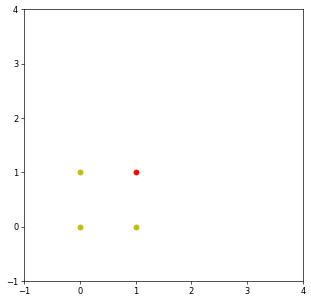

In [4]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(-1,4)
plt.ylim(-1,4)
for index,item in enumerate(test_inputs):
    if(correct_outputs[index]==True): #苹果
        plt.scatter(item[0],item[1],c='r')
    else:
        plt.scatter(item[0],item[1],c='y') 
plt.show()

In [15]:
## 随便写的3个随机数
weight1 = 0.8
weight2 = 0.8
bias = -0.5
# weight1*x1 + weight2*x2 + bias = 0
X = np.linspace(-5,5,10)
Y = -(weight1*X + bias)/weight2


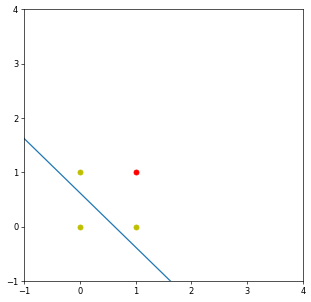

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.plot(X,Y)
for index,item in enumerate(test_inputs):
    if(correct_outputs[index]==True): #苹果
        plt.scatter(item[0],item[1],c='r')
    else:
        plt.scatter(item[0],item[1],c='y') 
plt.show()

In [17]:
# 激活函数
def activeFunction(value):
    if value >0:
        return True
    else:
        return False

In [19]:
for index,item in enumerate(test_inputs):
    result = weight1* item[0] + weight2*item[1]+bias
    if(activeFunction(result)== correct_outputs[index]):
        print("{},{}，我很开心，被正确的分类了".format(item[0],item[1]))
    else:
        print("{},{}，我不开心，被错误的分类了,线要靠近我一点".format(item[0],item[1])) 

0,0，我很开心，被正确的分类了
0,1，我不开心，被错误的分类了,线要靠近我一点
1,0，我不开心，被错误的分类了,线要靠近我一点
1,1，我很开心，被正确的分类了


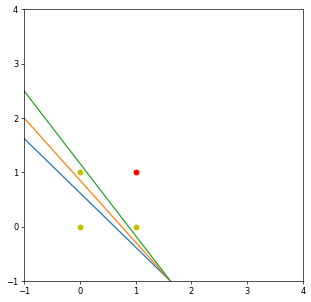

In [25]:
## 感知机的靠近过程，如何让直线靠近一个点
#0.8*X1 + 0.8*X2 - 0.5 = 0  靠近0，1坐标点 减去（0，1，1）* learningrate
##（0.8-0）*X1 + （0.8-0.1）*X2 + (-0.5 - 0.1)
# 0.8X1 + 0.7X2 - 0.6 = 0  
## （0.8X1）+0.6X2 - 0.7 = 0
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(6,6),dpi=60)
plt.xlim(-1,4)
plt.ylim(-1,4)
plt.plot(X,Y)
plt.plot(X,(0.6-0.8*X)/0.7)
plt.plot(X,(0.7-0.8*X)/0.6)
for index,item in enumerate(test_inputs):
    if(correct_outputs[index]==True): #苹果
        plt.scatter(item[0],item[1],c='r')
    else:
        plt.scatter(item[0],item[1],c='y') 
plt.show()


## 感知机算法流程

点$（p,q)$  分类

分类计算公式$
\widehat {y}=step\left( w_{1}x_{1}+w_{2}x_{2}+b\right)
$


setp为激活函数（例如，大于0，为苹果，小于0为香蕉）



感知机算法流程：

* 如果点（p，q）分类正确， 什么事情都不做
* 如果点（p，q）分类不正确
  * 分类为香蕉，实际上是苹果。 线往下移，靠近$（p,q,1）$坐标点。  学习速率为$\alpha$ , $(w_{1},w_{2},b)$ 加上 $(\alpha*p,\alpha*q,\alpha*1)$ 
    * $(w_{1}=w_{1}+\alpha*p,w_{2}=w_{2}+\alpha*q,b=b+ \alpha*1)$
  * 分类为苹果，实际上是香蕉。 线往上移，靠近$（p,q,1）$坐标点。  学习速率为$\alpha$ , $(w_{1},w_{2},b)$ 减去 $(\alpha*p,\alpha*q,\alpha*1)$
    * $(w_{1}=w_{1}-\alpha*p,w_{2}=w_{2}-\alpha*q,b=b - \alpha*1)$

## 苹果香蕉分类器完整实现

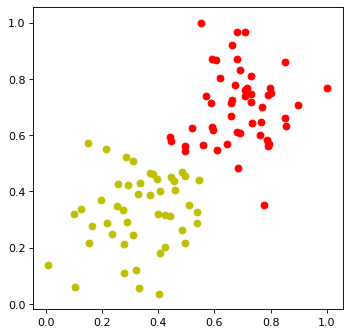

In [10]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("data-ganzhiji.csv",delimiter=',')
X = data[:,0:2]
y = data[:,2:3]

fig = plt.figure(figsize=(5,5),dpi=80)
for i in range(len(y)):
    if(y[i]==0): #香蕉
        plt.scatter(X[i][0],X[i][1],c='y')
    else:
        plt.scatter(X[i][0],X[i][1],c='r')
plt.show()

In [82]:
W = np.array(np.random.rand(2,1))
b = np.random.rand(1)[0]
# W[0]*X1 + W[1]*X2 + b = 0

<IPython.core.display.Javascript object>


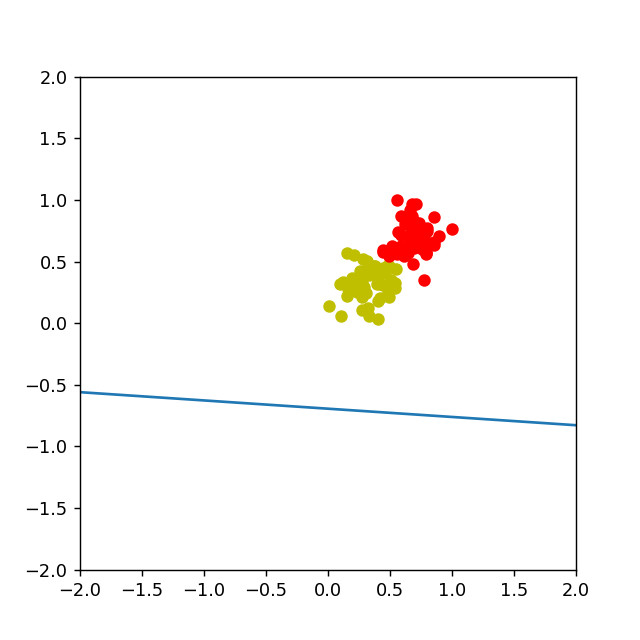

In [84]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("data-ganzhiji.csv",delimiter=',')
X = data[:,0:2]
y = data[:,2:3]

fig = plt.figure(figsize=(5,5),dpi=80)
for i in range(len(y)):
    if(y[i]==0): #香蕉
        plt.scatter(X[i][0],X[i][1],c='y')
    else:
        plt.scatter(X[i][0],X[i][1],c='r')

XX = np.linspace(-2,2,10)
Y = -(b+W[0]*XX)/W[1]
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(XX,Y)
plt.show()

In [128]:
## 激活函数
def stepFunction(value):
    if value>=0:
        return 1  #预测的结果是苹果
    else :
        return 0  #预测的结果是香蕉
    
    
## w1*x1 + w2*x2+b -->stepFunction
## 一个感知机预测的结果
def perception(X,W,b):
    return stepFunction((np.matmul(X,W)+b)[0])
learn_rate = 0.01
## 查看数据集合里面的每个数据点
for i in range(len(X)):
    y_hat = prediction(X[i],W,b) #得到预测结果
    y_real = y[i] ## 真实的结果
    if y_real - y_hat == 1: #真实是苹果1，预测是香蕉0，线往下移动 用加法
        W[0] += X[i][0]*learn_rate
        W[1] += X[i][1]*learn_rate
        b += learn_rate*1
    if y_real - y_hat == -1: #真实是香蕉0，预测是苹果1，线往上移动 用减法
        W[0] -= X[i][0]*learn_rate
        W[1] -= X[i][1]*learn_rate
        b -= learn_rate*1
    if y_real- y_hat == 0: ## 真实是苹果1，预测是苹果1， 真实是香蕉1，预测是香蕉1
        pass
    

<IPython.core.display.Javascript object>


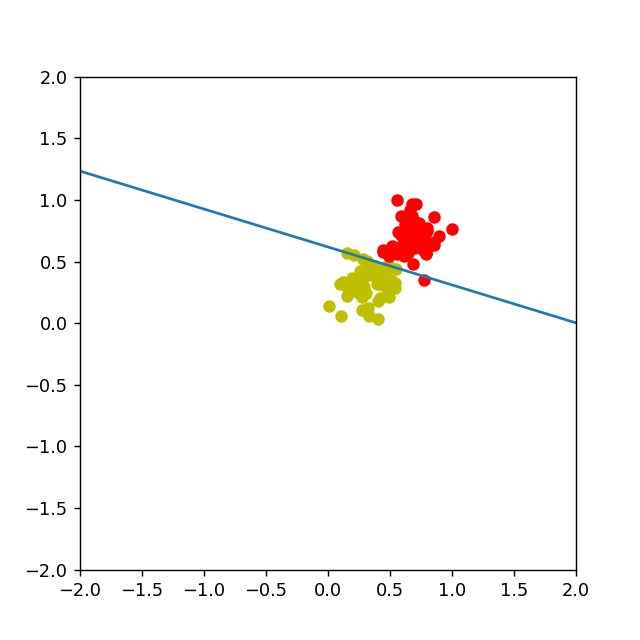

In [131]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("data-ganzhiji.csv",delimiter=',')
X = data[:,0:2]
y = data[:,2:3]

fig = plt.figure(figsize=(5,5),dpi=80)
for i in range(len(y)):
    if(y[i]==0): #香蕉
        plt.scatter(X[i][0],X[i][1],c='y')
    else:
        plt.scatter(X[i][0],X[i][1],c='r')

XX = np.linspace(-2,2,10)
Y = -(b+W[0]*XX)/W[1]
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.plot(XX,Y)
plt.show()